In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [4]:
# Load the data
train = pd.read_csv(r"C:\Users\Jojo\Downloads/train/train.csv")
test = pd.read_csv(r"C:\Users\Jojo\Downloads/train/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

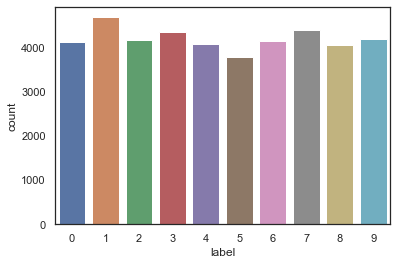

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train = X_train / 255.0
test = test / 255.0

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
random_seed = 2

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

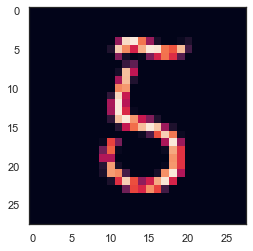

In [13]:
g = plt.imshow(X_train[11][:,:,0])

In [14]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [16]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [20]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
439/439 - 123s - loss: 0.4161 - accuracy: 0.8638 - val_loss: 0.0588 - val_accuracy: 0.9821


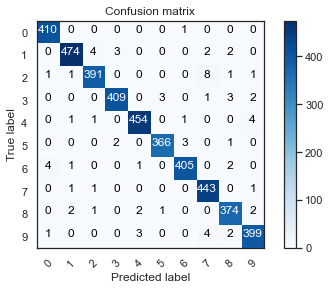

In [23]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [24]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [25]:

import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [26]:
train_labels =  []
train_samples = []

In [27]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [28]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [33]:

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [34]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [35]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.loss = 'sparse_categorical_crossentropy'


In [37]:
model.loss


'sparse_categorical_crossentropy'

In [38]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
210/210 - 0s - loss: 0.6931 - accuracy: 0.5748
Epoch 2/20
210/210 - 0s - loss: 0.6706 - accuracy: 0.6243
Epoch 3/20
210/210 - 0s - loss: 0.6449 - accuracy: 0.6638
Epoch 4/20
210/210 - 0s - loss: 0.6183 - accuracy: 0.6933
Epoch 5/20
210/210 - 0s - loss: 0.5907 - accuracy: 0.7181
Epoch 6/20
210/210 - 0s - loss: 0.5632 - accuracy: 0.7371
Epoch 7/20
210/210 - 0s - loss: 0.5354 - accuracy: 0.7719
Epoch 8/20
210/210 - 0s - loss: 0.5059 - accuracy: 0.8010
Epoch 9/20
210/210 - 0s - loss: 0.4769 - accuracy: 0.8181
Epoch 10/20
210/210 - 0s - loss: 0.4494 - accuracy: 0.8552
Epoch 11/20
210/210 - 0s - loss: 0.4229 - accuracy: 0.8690
Epoch 12/20
210/210 - 0s - loss: 0.3984 - accuracy: 0.8881
Epoch 13/20
210/210 - 0s - loss: 0.3767 - accuracy: 0.9000
Epoch 14/20
210/210 - 0s - loss: 0.3581 - accuracy: 0.9095
Epoch 15/20
210/210 - 0s - loss: 0.3422 - accuracy: 0.9162
Epoch 16/20
210/210 - 0s - loss: 0.3291 - accuracy: 0.9205
Epoch 17/20
210/210 - 0s - loss: 0.3184 - accuracy: 0.9248
Epoch 

In [39]:
model.fit(scaled_train_samples, train_labels, validation_split = 0.20, batch_size=10, 
          epochs=20, shuffle=True, verbose=2)

Epoch 1/20
168/168 - 1s - loss: 0.3172 - accuracy: 0.9244 - val_loss: 0.1925 - val_accuracy: 0.9857
Epoch 2/20
168/168 - 0s - loss: 0.3150 - accuracy: 0.9244 - val_loss: 0.1882 - val_accuracy: 0.9857
Epoch 3/20
168/168 - 0s - loss: 0.3130 - accuracy: 0.9268 - val_loss: 0.1839 - val_accuracy: 0.9857
Epoch 4/20
168/168 - 0s - loss: 0.3114 - accuracy: 0.9310 - val_loss: 0.1802 - val_accuracy: 0.9857
Epoch 5/20
168/168 - 0s - loss: 0.3101 - accuracy: 0.9286 - val_loss: 0.1770 - val_accuracy: 0.9857
Epoch 6/20
168/168 - 0s - loss: 0.3089 - accuracy: 0.9286 - val_loss: 0.1746 - val_accuracy: 0.9881
Epoch 7/20
168/168 - 0s - loss: 0.3077 - accuracy: 0.9310 - val_loss: 0.1718 - val_accuracy: 0.9881
Epoch 8/20
168/168 - 0s - loss: 0.3069 - accuracy: 0.9298 - val_loss: 0.1690 - val_accuracy: 0.9857
Epoch 9/20
168/168 - 0s - loss: 0.3057 - accuracy: 0.9310 - val_loss: 0.1669 - val_accuracy: 0.9881
Epoch 10/20
168/168 - 0s - loss: 0.3048 - accuracy: 0.9304 - val_loss: 0.1647 - val_accuracy: 0.9881

In [40]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [41]:
mobile = keras.applications.mobilenet.MobileNet()


17227776/17225924 [==============================] - 3s 0us/step


In [42]:
def prepare_image(file):
    img_path = 'MobileNet-inference-images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [43]:
from IPython.display import Image
Image(filename='MobileNet-inference-images/1.PNG', width=300,height=200)

FileNotFoundError: [Errno 2] No such file or directory: 'MobileNet-inference-images/1.PNG'

In [44]:
#Import required packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [45]:
np.random.seed(2018)

In [46]:
train_data, test_data = np.random.random((1000,
3)), np.random.random((500, 3))


In [47]:
labels = np.random.randint(2, size=(1000, 1))

In [48]:
model = Sequential()
model.add(Dense(5, input_dim=3,
activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy',
optimizer="adam", metrics=['accuracy'])


In [49]:
model.fit(train_data, labels, epochs=10,
batch_size=32)
#Make predictions from the trained model
predictions = model.predict(test_data)

Epoch 1/10
32/32 [==============================] - 0s 726us/step - loss: 0.6949 - accuracy: 0.5020
Epoch 2/10
32/32 [==============================] - 0s 728us/step - loss: 0.6939 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 811us/step - loss: 0.6936 - accuracy: 0.4780
Epoch 4/10
32/32 [==============================] - 0s 779us/step - loss: 0.6935 - accuracy: 0.4910
Epoch 5/10
32/32 [==============================] - 0s 841us/step - loss: 0.6936 - accuracy: 0.4830
Epoch 6/10
32/32 [==============================] - 0s 717us/step - loss: 0.6935 - accuracy: 0.4920
Epoch 7/10
32/32 [==============================] - 0s 842us/step - loss: 0.6932 - accuracy: 0.4970
Epoch 8/10
32/32 [==============================] - 0s 810us/step - loss: 0.6932 - accuracy: 0.4840
Epoch 9/10
32/32 [==============================] - 0s 872us/step - loss: 0.6931 - accuracy: 0.4910
Epoch 10/10
32/32 [==============================] - 0s 873us/step - loss: 0.6929 - accuracy: 0.4970

In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
# Generate dummy training dataset
np.random.seed(2018)
x_train = np.random.random((6000,10))
y_train = np.random.randint(2, size=(6000, 1))
# Generate dummy validation dataset
x_val = np.random.random((2000,10))
y_val = np.random.randint(2, size=(2000, 1))
# Generate dummy test dataset
x_test = np.random.random((2000,10))
y_test = np.random.randint(2, size=(2000, 1))


In [52]:
model = Sequential()
model.add(Dense(64, input_dim=10,activation =
"relu")) #Layer 1
model.add(Dense(32,activation =
"relu")) #Layer 2
model.add(Dense(16,activation =
"relu")) #Layer 3
model.add(Dense(8,activation =
"relu")) 
model.add(Dense(4,activation =
"relu")) #Layer 5
model.add(Dense(1,activation =
"sigmoid")) #Output Layer
#Configure the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [54]:
model.fit(x_train, y_train, batch_size=64,
epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 8/10
94/94 [==

In [56]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) =boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [59]:
#Explore the data structure using basic python

print("Type of the Dataset:",type(y_train))
print("Shape of training data :",x_train.shape)
print("Shape of training labels:",y_train.shape)
print("Shape of testing data :",type(x_test))
print("Shape of testing labels :",y_test.shape)


Type of the Dataset: <class 'numpy.ndarray'>
Shape of training data : (404, 13)
Shape of training labels: (404,)
Shape of testing data : <class 'numpy.ndarray'>
Shape of testing labels : (102,)


In [61]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [63]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
#Extract the last 100 rows from the training.
x_val = x_train[300:,]
y_val = y_train[300:,]

In [64]:
#Define the model architecture
model = Sequential()
model.add(Dense(13, input_dim=13,
kernel_initializer="normal", activation="relu"))
model.add(Dense(6, kernel_initializer="normal",
activation="relu"))
model.add(Dense(1, kernel_initializer="normal"))
# Compile model

In [67]:
model.compile(loss='mean_squared_error',
optimizer="adam", metrics=
['mean_absolute_percentage_error'])
#Train the model
model.fit(x_train, y_train, batch_size=32,
epochs=30, validation_data=(x_val,y_val))


Epoch 1/30
13/13 [==============================] - 0s 8ms/step - loss: 305.1771 - mean_absolute_percentage_error: 61.0398 - val_loss: 302.9354 - val_mean_absolute_percentage_error: 52.0654
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 198.6016 - mean_absolute_percentage_error: 44.5291 - val_loss: 187.7709 - val_mean_absolute_percentage_error: 35.8730
Epoch 3/30
13/13 [==============================] - 0s 2ms/step - loss: 124.2441 - mean_absolute_percentage_error: 36.7366 - val_loss: 126.2827 - val_mean_absolute_percentage_error: 33.8542
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 102.4544 - mean_absolute_percentage_error: 39.2451 - val_loss: 116.5356 - val_mean_absolute_percentage_error: 36.8940
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 101.3722 - mean_absolute_percentage_error: 40.2479 - val_loss: 113.7003 - val_mean_absolute_percentage_error: 34.7858
Epoch 6/30
13/13 [==============================] 

In [68]:
results = model.evaluate(x_test, y_test)
for i in range(len(model.metrics_names)):
 print(model.metrics_names[i]," : ",results[i])


4/4 [==============================] - 0s 746us/step - loss: 61.6945 - mean_absolute_percentage_error: 30.0469
loss  :  61.69450759887695
mean_absolute_percentage_error  :  30.046911239624023


In [70]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Jojo\Downloads/train.csv")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)


Shape of the Dataset: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [73]:
store =pd.read_csv(r"C:\Users\Jojo\Downloads/store.csv")
print("Shape of the Dataset:",store.shape)
#Display the first 5 rows of data using the head

store.head(5)

Shape of the Dataset: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [74]:
df_new = df.merge(store,on=["Store"],how="inner")
print(df_new.shape)

(1017209, 18)


In [75]:
print("Distinct number of Stores :",len(df_new["Store"].unique()))
print("Distinct number of Days :",len(df_new["Date"].unique()))
print("Average daily sales of all stores :",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores : 5773.82


In [76]:
df_new.dtypes


Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [77]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [78]:
import numpy as np
df_new['Date'] = pd.to_datetime(df_new['Date'],
infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

In [79]:
df_new["Season"] =np.where(df_new["Month"].isin([3,4,5]),"Spring",np.where(df_new["Month"].isin([6,7,8]),"Summer",
 np.where(df_new["Month"].isin([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))


In [80]:
print(df_new[["Date","Year","Month","Day","Week"
,"Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


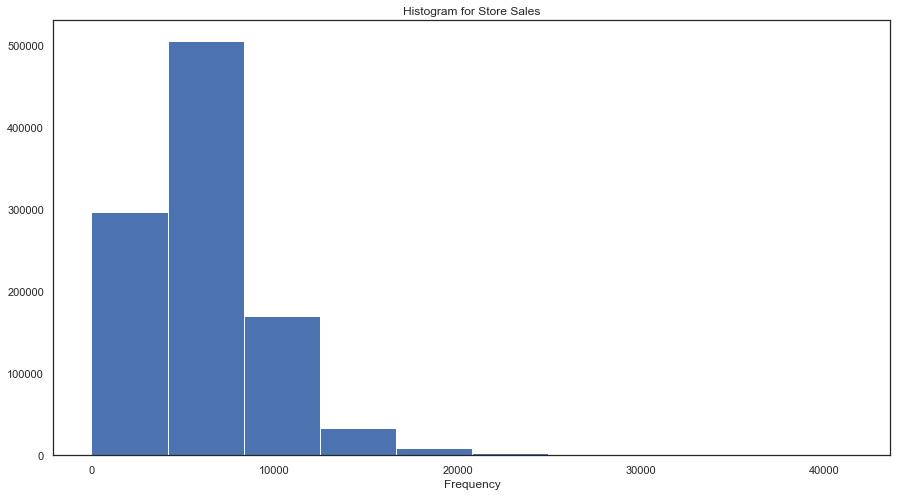

In [83]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


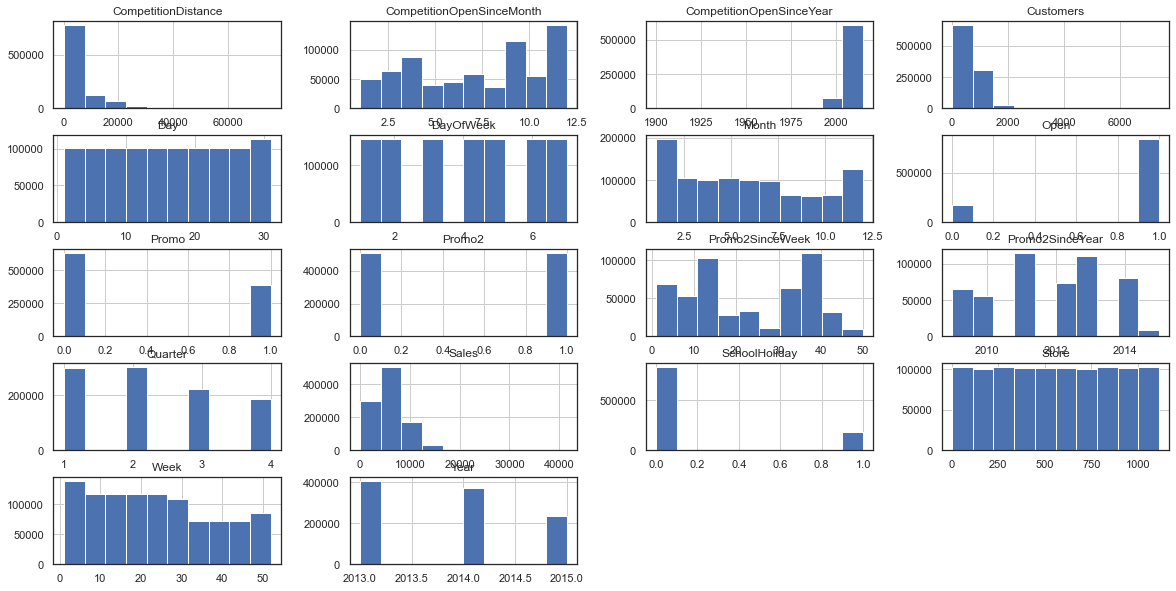

In [85]:
df_new.hist(figsize=(20,10))
plt.show()

In [86]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [87]:
df_new["CompetitionDistance"].mode()

0    250.0
dtype: float64

In [89]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

In [91]:
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

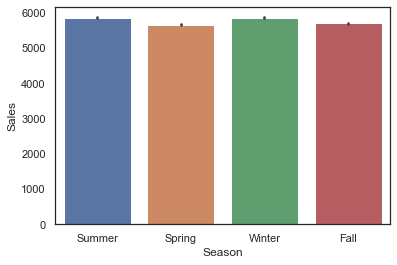

In [92]:
import seaborn as sns 
ax = sns.barplot(x="Season", y="Sales",
data=df_new)

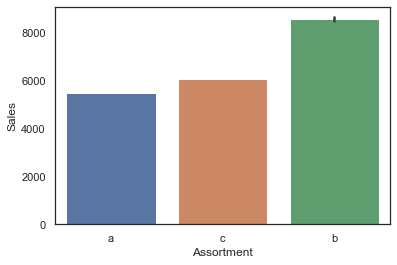

In [93]:
ax = sns.barplot(x="Assortment", y="Sales",
data=df_new)

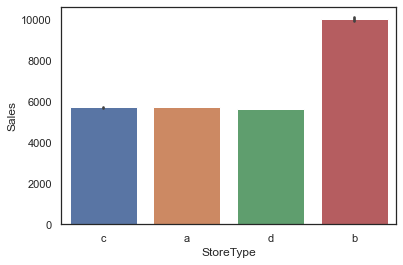

In [94]:
ax = sns.barplot(x="StoreType", y="Sales",
data=df_new)

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target = ["Sales"]
numeric_columns =["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns =["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]

In [97]:
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns=column_names))


In [98]:
temp = df_new[numeric_columns]
for column in categorical_columns:
 temp_df = create_ohe(df_new,column)
 temp = pd.concat([temp,temp_df],axis=1)

In [99]:
print("Shape of Data:",temp.shape)
print("DistinctDatatypes:",temp.dtypes.unique())


Shape of Data: (1017209, 44)
DistinctDatatypes: [dtype('int64') dtype('O') dtype('float64')]


In [100]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [101]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [102]:
temp["StateHoliday"]=np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)
x_train, x_val, y_train, y_val =train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

In [106]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [107]:
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [108]:
print("MAE for Test Data:",abs(y_test -mean_sales).mean()[0])


MAE for Test Data: 2883.587604303215


In [109]:
model = Sequential()
model.add(Dense(150,input_dim =44,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_absolute_error",metrics=["mean_absolute_error"])
model.fit(x_train.values,y_train.values,validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 9s 798us/step - loss: 953.4782 - mean_absolute_error: 953.4782 - val_loss: 831.7196 - val_mean_absolute_error: 831.7196
Epoch 2/10
11444/11444 [==============================] - 8s 694us/step - loss: 786.6789 - mean_absolute_error: 786.6789 - val_loss: 747.5573 - val_mean_absolute_error: 747.5573
Epoch 3/10
11444/11444 [==============================] - 8s 695us/step - loss: 742.9788 - mean_absolute_error: 742.9788 - val_loss: 728.7723 - val_mean_absolute_error: 728.7723
Epoch 4/10
11444/11444 [==============================] - 8s 671us/step - loss: 725.3604 - mean_absolute_error: 725.3604 - val_loss: 724.5439 - val_mean_absolute_error: 724.5439
Epoch 5/10
11444/11444 [==============================] - 8s 673us/step - loss: 713.7603 - mean_absolute_error: 713.7603 - val_loss: 703.3583 - val_mean_absolute_error: 703.3583
Epoch 6/10
11444/11444 [==============================] - 8s 670us/step - loss: 706.5028 - mean_absolute_error

In [110]:
result =model.evaluate(x_test.values,y_test.values)
#Print the results
for i in range(len(model.metrics_names)):
    print("Metric",model.metrics_names[i],":",str(round(result[i],2)))


6358/6358 [==============================] - 5s 863us/step - loss: 676.2997 - mean_absolute_error: 676.2997
Metric loss : 676.3
Metric mean_absolute_error : 676.3


In [112]:
model = Sequential()
model.add(Dense(150,input_dim =
44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])


In [113]:
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric",model.metrics_names[i],":",str(round(result[i],2)))


Epoch 1/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1738494.1250 - mean_absolute_error: 857.8074 - val_loss: 1231885.5000 - val_mean_absolute_error: 747.9931
Epoch 2/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1172656.5000 - mean_absolute_error: 724.3940 - val_loss: 1157574.8750 - val_mean_absolute_error: 724.4283
Epoch 3/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1095484.8750 - mean_absolute_error: 700.2535 - val_loss: 1013985.0000 - val_mean_absolute_error: 669.4919
Epoch 4/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1064330.8750 - mean_absolute_error: 690.3194 - val_loss: 1003128.2500 - val_mean_absolute_error: 677.6401
Epoch 5/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1035412.1875 - mean_absolute_error: 681.4519 - val_loss: 967693.6875 - val_mean_absolute_error: 662.4395
Epoch 6/15
11444/11444 [==============================] - 18s 2ms/step - los

In [114]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim =44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

In [115]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)

Epoch 1/15
11444/11444 [==============================] - 42s 4ms/step - loss: 1632290.1250 - mean_absolute_error: 834.9694 - val_loss: 1411786.2500 - val_mean_absolute_error: 786.3325
Epoch 2/15
11444/11444 [==============================] - 46s 4ms/step - loss: 1166126.0000 - mean_absolute_error: 721.7535 - val_loss: 1043218.6875 - val_mean_absolute_error: 696.8870
Epoch 3/15
11444/11444 [==============================] - 45s 4ms/step - loss: 1095092.5000 - mean_absolute_error: 699.7335 - val_loss: 1043872.4375 - val_mean_absolute_error: 695.0023
Epoch 4/15
11444/11444 [==============================] - 46s 4ms/step - loss: 1061925.6250 - mean_absolute_error: 688.9095 - val_loss: 1061145.5000 - val_mean_absolute_error: 707.6302
Epoch 5/15
11444/11444 [==============================] - 46s 4ms/step - loss: 1033007.9375 - mean_absolute_error: 680.1249 - val_loss: 1135814.1250 - val_mean_absolute_error: 748.0995
Epoch 6/15
11444/11444 [==============================] - 48s 4ms/step - lo

In [116]:
for i in range(len(model.metrics_names)):
    print("Metric",model.metrics_names[i],":",str(round(result[i],2)))


Metric loss : 854189.62
Metric mean_absolute_error : 615.73


<ipython-input-120-24624f632d92>:6: MatplotlibDeprecationWarning: Unrecognized location 'upperright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Validation'], loc='upperright')


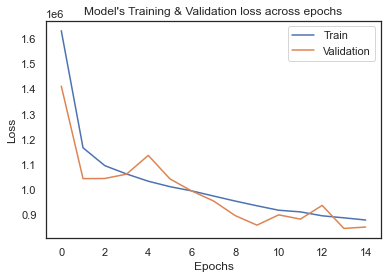

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upperright')
plt.show()